### EYE DETECTION 

##### HAAR CASCADE CLASSIFIER:
A machine learning based approach where a cascade function is trained with lots of positive and negative images.
It is a pre-trained classifier.

#### Positive Images:
Images which you want to detect.

#### Negative Images:
Images which does not contain objects which you want to detect.

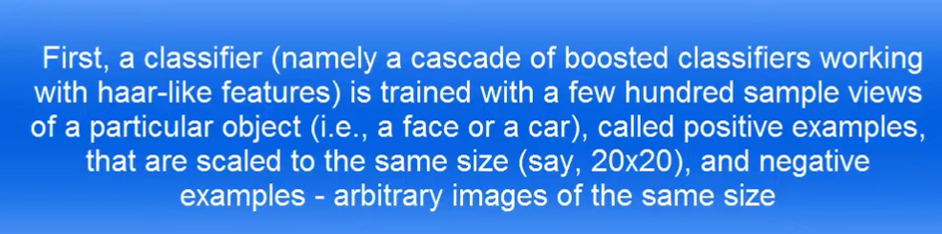


Once the classifier is trained, it can be applied to a region of interest in an input image.

The classifier outputs 1 if the region is likely to show the object else 0


Trained Haar Cascade Classifier XML is used.

To detect the eyes, it is obvious that they only resides within a face. So the region of interest will be our face.

In [1]:
# importing necessary libraries

import cv2
import numpy as np

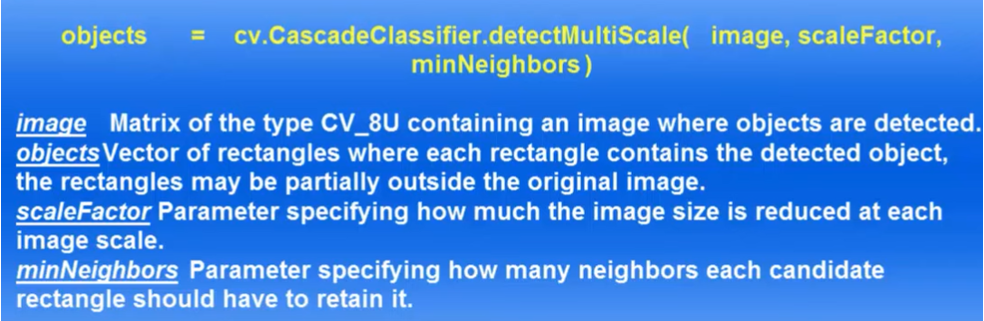

In [6]:
# Face Classifier
face_cascade = cv2.CascadeClassifier('./Classifier/haarcascade_frontalface_default.xml')

#Eye Classifier
eye_cascade = cv2.CascadeClassifier('./Classifier/haarcascade_eye_tree_eyeglasses.xml')

# Capturing a video.
cap = cv2.VideoCapture('./sample_videos/eyes_in.mp4')

fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2. VideoWriter("./sample_videos/eye_out.mp4", fourcc, 20.0, (1280,720))

while cap.isOpened():

    _, img = cap.read()
    img = np.array(img, dtype=np.uint8)

    # Converting into grayscale mode image.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Detecting the faces in the frame.
    faces = face_cascade.detectMultiScale(gray, 1.1, 4)

    for (x, y , w ,h) in faces:

        cv2.rectangle(img, (x,y), (x+w, y+h), (255, 0 , 0), 3)

        # Region of interest will be now the face out of gray scale image.
        roi_gray = gray[y:y+h, x:x+w]
        
        # Rectangle over eyes will be drawn on the color face image.
        roi_color = img[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey ,ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex,ey), (ex+ew, ey+eh), (0, 255, 0), 5)

    if _ == True:
        out.write(img)
        cv2.imshow('img', img)
        if cv2.waitKey(1) == ord('q'): 
            break
    else:
        break

cap.release()
out.release() 
cv2.destroyAllWindows()